   <h1> ABOUT COVID-19 </h1>
<img src="https://ong.ohio.gov/stories/covid19/images/logos/covid-19.png" width="25%"/>
<img src="https://th.bing.com/th/id/OIP.pfqs4_2jELtzZn6ZSS1T8QHaHZ?o=6&pid=Api&rs=1" width="25%"/>

# before start

- ## what is C0VID-19?
> Coronaviruses are a large group of viruses that are common among animals. In rare cases, they are what scientists call zoonotic, meaning they can be transmitted from animals to humans, according to the US Centers for Disease Control and Prevention. more information __[*here.*](https://www.cnn.com/2020/01/20/health/what-is-coronavirus-explained/index.html)__

- ## why is it called COVID-19? 

> **COVID-19** is the name for the `disease` in humans caused by the new virus, says Dr. Bhuyan. (And that's short for coronavirus disease 2019, the year it was first identified, she adds.) more information __[*here.*](https://www.womenshealthmag.com/health/a31704399/why-is-it-called-coronavirus/)__

 ## importing required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from IPython.display import display, HTML
plt.style.use('ggplot')

## downloading data sets

In [2]:
confirmed_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'
deaths_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv'

confirmed_df = pd.read_csv(confirmed_url)
deaths_df = pd.read_csv(deaths_url)

## getting all data sets ready - step by step

In [3]:
c_df = confirmed_df.copy()
d_df = deaths_df.copy()

In [4]:
path = 'https://raw.githubusercontent.com/ThisIsMahdiZare/about-covid19/main/data/Population.csv'
population_df = pd.read_csv(path)
population_df.index = population_df['Country/Region']
population_df = population_df.drop(population_df.columns[0], axis=1)

In [5]:
c_df = c_df.drop(c_df.columns[[0, 2, 3]], axis=1)
d_df = d_df.drop(d_df.columns[[0, 2, 3]], axis=1)

In [6]:
c_df = c_df.groupby('Country/Region').sum()
d_df = d_df.groupby('Country/Region').sum()

In [7]:
c_df = c_df.transpose()
d_df = d_df.transpose()

In [8]:
del c_df['Diamond Princess']
del d_df['Diamond Princess']

In [9]:
temp_df = pd.DataFrame(index=c_df.index.to_list(),
                       columns=c_df.columns.to_list())
for day in temp_df.index:
    temp1 = pd.Series(c_df.loc[day]).div(population_df['Population'])
    temp_df.at[day, :] = temp1
temp_df = temp_df.apply(pd.to_numeric)

## about data sets

In [10]:
c_df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
12/24/21,157887,207221,216098,21730,70221,4216,5445236,344261,291135,1260751,...,11958841,406739,197918,7,442999,1620869,467682,10109,228932,202736
12/25/21,157895,207542,216376,21730,71142,4236,5452419,344379,300594,1262836,...,11958928,407099,198099,7,442999,1636455,467682,10111,231581,203746
12/26/21,157951,207709,216637,21730,71752,4236,5460042,344481,310478,1264553,...,11958928,407381,198242,7,443332,1651673,467682,10115,233120,204351
12/27/21,157967,207709,216930,22332,71752,4259,5480305,344540,322275,1266103,...,12277814,407981,198387,7,443332,1666545,468619,10118,234476,205449
12/28/21,157998,208352,217265,22540,76787,4259,5514207,344649,339953,1268519,...,12406697,408894,198487,7,443983,1680985,469452,10123,238383,207548


In [11]:
d_df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
12/24/21,7348,3187,6222,139,1746,118,117008,7939,2188,13617,...,148324,6162,1475,1,5312,30766,4884,1982,3691,4871
12/25/21,7349,3189,6229,139,1746,118,117020,7942,2190,13626,...,148324,6163,1477,1,5312,31007,4884,1983,3697,4885
12/26/21,7354,3194,6238,139,1749,118,117035,7943,2196,13634,...,148324,6163,1479,1,5314,31214,4884,1983,3702,4891
12/27/21,7354,3194,6246,139,1749,118,117066,7950,2202,13650,...,148470,6165,1481,1,5314,31418,4907,1984,3709,4908
12/28/21,7355,3207,6254,140,1756,118,117085,7965,2210,13672,...,148488,6167,1484,1,5319,31632,4912,1984,3716,4940


In [12]:
data_sets = [c_df, d_df]
print('technical information about data sets :\n')
for data in data_sets:
    print(data.info(), '\n\n\n')

technical information about data sets :

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 1/22/20 to 12/28/21
Columns: 195 entries, Afghanistan to Zimbabwe
dtypes: int64(195)
memory usage: 1.1+ MB
None 



<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 1/22/20 to 12/28/21
Columns: 195 entries, Afghanistan to Zimbabwe
dtypes: int64(195)
memory usage: 1.1+ MB
None 





In [13]:
print(f'list of countries :\n\n {c_df.columns.tolist()}')

list of countries :

 ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indon

In [14]:
print('start day : {}\nlast date : {}\n\nfirst country : {}\nlast country : {}\n\nnumer of dates : {}\nnumer of countries : {}'.format(
    c_df.index[0], '12/12/20', c_df.columns[0], c_df.columns[-1], c_df.shape[0], c_df.shape[1]))                      

start day : 1/22/20
last date : 12/12/20

first country : Afghanistan
last country : Zimbabwe

numer of dates : 707
numer of countries : 195


## numeric reports

### global report

In [15]:
def convert_today_date():

    today = datetime.datetime.today()
    today = today - datetime.timedelta(days=1)
    return '{}/{}/{}'.format(today.month, today.day, str(today.year)[2:])


def convert_yesterday_date():

    format = "%m/%d/%Y"
    today = datetime.datetime.today()
    yesterday = today - datetime.timedelta(days=2)
    return '{}/{}/{}'.format(yesterday.month, yesterday.day, str(yesterday.year)[2:])


def country_numeric_report(country='US'):

    date1 = convert_today_date()
    date2 = convert_yesterday_date()

    print(f'covid-19 summary report for {country}.\n\n    date : {date1}\n\n\ntotal cases : {c_df.loc[date1,country].sum()}\nnew cases : {c_df.loc[date1,country].sum() - c_df.loc[date2,country].sum()}\n\ntotal deaths : {d_df.loc[date1,country].sum()}\nnew deaths : {d_df.loc[date1,country].sum() - d_df.loc[date2,country].sum()}\ntotal deaths to total cases ratio : {d_df.loc[date1,country].sum()/c_df.loc[date1,country].sum()}')

In [16]:
print(f'Global summary report.\ndate : {convert_today_date()}\n\ntotal cases : {c_df.loc[convert_today_date()].sum()}\nnew cases : {c_df.loc[convert_today_date()].sum() - c_df.loc[convert_yesterday_date()].sum()}\n\ntotal deaths : {d_df.loc[convert_today_date()].sum()}\nnew deaths : {d_df.loc[convert_today_date()].sum() - d_df.loc[convert_yesterday_date()].sum()}')

Global summary report.
date : 12/28/21

total cases : 282799305
new cases : 1313713

total deaths : 5414200
new deaths : 7279


In [17]:
country_numeric_report('Italy')

covid-19 summary report for Italy.

    date : 12/28/21


total cases : 5756412
new cases : 78300

total deaths : 136955
new deaths : 202
total deaths to total cases ratio : 0.02379172998736018


In [18]:
country_numeric_report('Iran')

covid-19 summary report for Iran.

    date : 12/28/21


total cases : 6188857
new cases : 2128

total deaths : 131474
new deaths : 40
total deaths to total cases ratio : 0.021243664217803063


In [19]:
country_numeric_report('Australia')

covid-19 summary report for Australia.

    date : 12/28/21


total cases : 339953
new cases : 17678

total deaths : 2210
new deaths : 8
total deaths to total cases ratio : 0.006500898653637415


In [20]:
country_numeric_report('US')

covid-19 summary report for US.

    date : 12/28/21


total cases : 53170421
new cases : 377014

total deaths : 820708
new deaths : 2337
total deaths to total cases ratio : 0.015435424143058788


## bar charts

### functions

#### description of some effective parameters listed as below :

   - **single bar charts**
       > 1. ***`date`*** :
           *by changing this parameter , you can get correspond result for any date*
       > 1. ***`n_shown_countries`*** :
           *by changing this parameter , you can modify number of top countries for shown in charts*
           
           
          
   - **animated bar charts**
       > 1. ***`start_date`*** :
           *animation will start from here*
       > 1. ***`stop_date`*** :
           *animation will end here*
       > 1. ***`title`*** :
           *title of animation*

<div class="alert alert-block alert-success">
<b>since </b> we don't create animation for recovered cases, so there is no limit for animation dates here ( dates after 12/12/20 are allowed for animations)
</div>

In [21]:
def single_bar_chart(df, date=None, n_shown_countries=10):

    if df == 'confirmed':
        _t_df = c_df
    elif df == 'deaths':
        _t_df = d_df
    else:
        raise ValueError('invalid value for df. please choose between [confirmed, deaths]')

    if date is None:
        date = convert_today_date()

    _t_df = _t_df.loc[date].sort_values(
        ascending=False).head(n_shown_countries)
    ax_x = pd.Series(_t_df)
    ax_y = pd.Series(_t_df.index)

    ######################################################################

    fig1, ax = plt.subplots()
    fig1.set_figheight(8)
    fig1.set_figwidth(16)
    colors = plt.cm.hot(np.linspace(0, .7, 10))
    ax.grid(False)
    labes_y = ax.get_yticklabels()
    ax.text(0.95, 0.01, f'total cases = {_t_df.values.sum()}',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=20)
    plt.setp(labes_y, size=14)
    plt.xlim(0, int(_t_df[0] + .1*_t_df[0]))
    if df == 'confirmed':
        plt.title(
            f'top {n_shown_countries} most infected countries in {date}')
    if df == 'deaths':
        plt.title(f'top {n_shown_countries} deaths in {date}')
    plt.gca().invert_yaxis()
    ######################################################################

    a = plt.barh(ax_y, ax_x, color=colors)
    for i, v in enumerate(ax_x):
        ax.text(v + 3, i + .25, ' '+str(v), color='black',
                fontweight='bold', fontsize=12, va='bottom')
    plt.show()


def single_proportional_chart(date=None, n_shown_countries=10):

    if date is None:
        date = convert_today_date()
    if n_shown_countries < 5 or n_shown_countries > 25:
        raise ValueError(
            'number of shown countries must be in range of 5 to 25')

    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(14)

    temp1 = c_df.loc[date].sort_values(ascending=False).head(n_shown_countries)
    ax_x = pd.Series(temp1)
    ax_y = pd.Series(temp1.index)
    plt.xlim(0, int(temp1[0] + .1*temp1[0]))
    ax.barh(ax_y, ax_x, color='#000066')
    for i, v in enumerate(ax_x):
        ax.text(v + 3, i + .25, ' '+str(v), color='black',
                fontweight='bold', fontsize=12, va='bottom')


    temp2 = d_df[temp1.index.to_list()].loc[date]
    ax_x2 = pd.Series(temp2)
    ax.barh(ax_y, ax_x2, color='#890000')

    plt.gca().invert_yaxis()

    ax.text(0.95, 0.01, f'date : {date}\ntotal infected : {temp1.values.sum()}\ntotal deaths :{temp2.values.sum()}',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=15)

    plt.legend(labels=['confirmed', 'deaths'],
               loc='center right', prop={'size': 10})
    plt.show()


def single_total_cases_to_population(date=None, n_shown_countries=10):

    if date is None:
        date = convert_today_date()
    if n_shown_countries < 5 or n_shown_countries > 25:
        raise ValueError(
            'number of shown countries must be in range of 5 to 50')

    temp1 = pd.Series(c_df.loc[date])
    temp2 = population_df['Population']
    temp3 = temp1.div(temp2)
    frame = {f'{date}': temp1, 'Population': temp2, 'Propotion': temp3}
    f_df = pd.DataFrame(frame, index=temp2.index)
    f_df = f_df.sort_values(
        by='Propotion', ascending=False).head(n_shown_countries)

    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(18)
    plt.gca().invert_yaxis()
    ax.grid(False)
    ax_x = f_df['Propotion']
    ax_y = pd.Series(f_df.index)
    ax.barh(ax_y, ax_x, color='#00CC66')
    plt.title(
        f'Worst countries in terms of the division of total cases by population in {date}')
    plt.show()


def animated_bar_chart(df, start_date='1/22/20', stop_date=None, n_shown_countries=10, title=None, dpi=240, label_bar=True):
    '''
    plots an animated bar chart.

    parameters
    ----------
    df : str
        data frame to plot.
        order : {confirmed , deaths}

    start_date : str
        date to start animation

    stop_date :
        data top stop animation

    n_shown_countries : int
        number of shown countries


    '''

    if n_shown_countries < 5 or n_shown_countries > 25:
        raise ValueError(
            'number of shown countries must be in range of 5 to 25')
    ############################

    import bar_chart_race as bcr
    import warnings
    warnings.filterwarnings(action='ignore')
    ############################
    if stop_date is None:
        stop_date = convert_today_date()
    ############################

    colors = np.array([[.69, 0, 0, 1]])

    iloc_start = df.index.to_list().index(start_date)
    iloc_stop = df.index.to_list().index(stop_date)
    df = df.iloc[iloc_start:iloc_stop+2, :]
    if title is None:
        title = ''
    fig1 = plt.figure(figsize=(12, 6))
    ax = fig1.add_subplot(111)
    ax.grid(axis='y')
    ax.patch.set_facecolor('#C0C0C0')
    ax.set_title(title + f' from {start_date} to {stop_date}',
                 fontname='Comic Sans MS', fontsize=15)
    ax.tick_params(axis='y', which='both', labelsize=12)
    ax.tick_params(axis='x', which='both', labelsize=12)

    return bcr.bar_chart_race(df, n_bars=n_shown_countries, cmap=colors, steps_per_period=15, title_size=7, dpi=dpi, label_bars=label_bar, tick_label_size=8, fig=fig1, bar_kwargs={'lw': .3}, bar_size=.90)

### testing bar charts

**example**


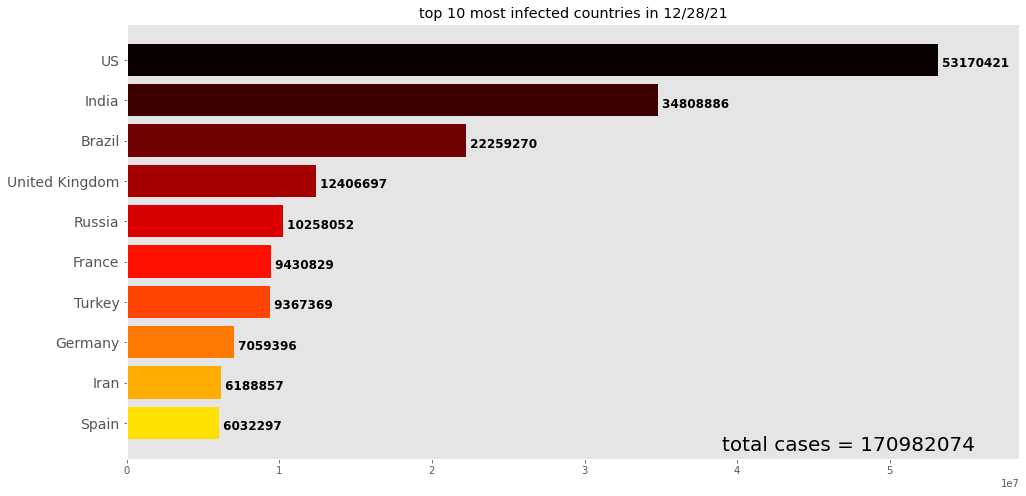

In [22]:
single_bar_chart(df='confirmed', n_shown_countries=10)

**example**

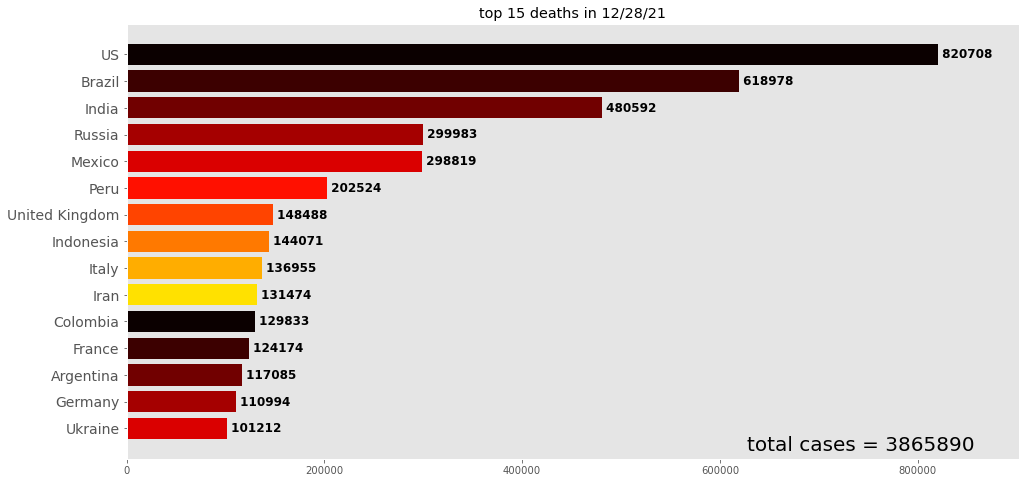

In [23]:
single_bar_chart(df='deaths', n_shown_countries=15)

**example**


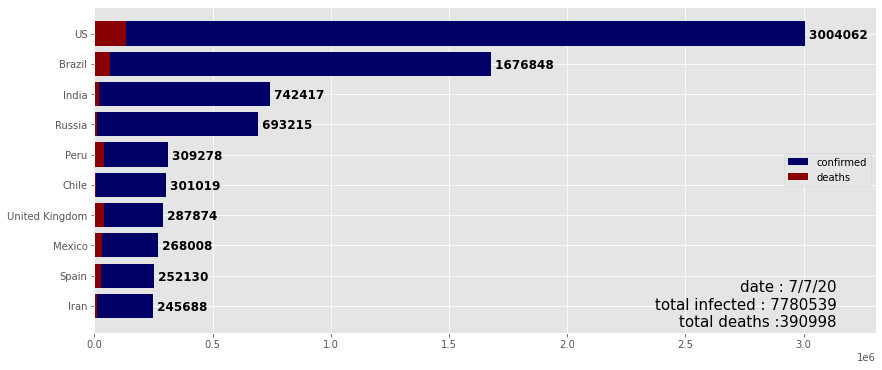

In [24]:
single_proportional_chart(date='7/7/20')

**example**

***note : each ranking of below chart has obtained by this method : ` total number of infected cases / population `***

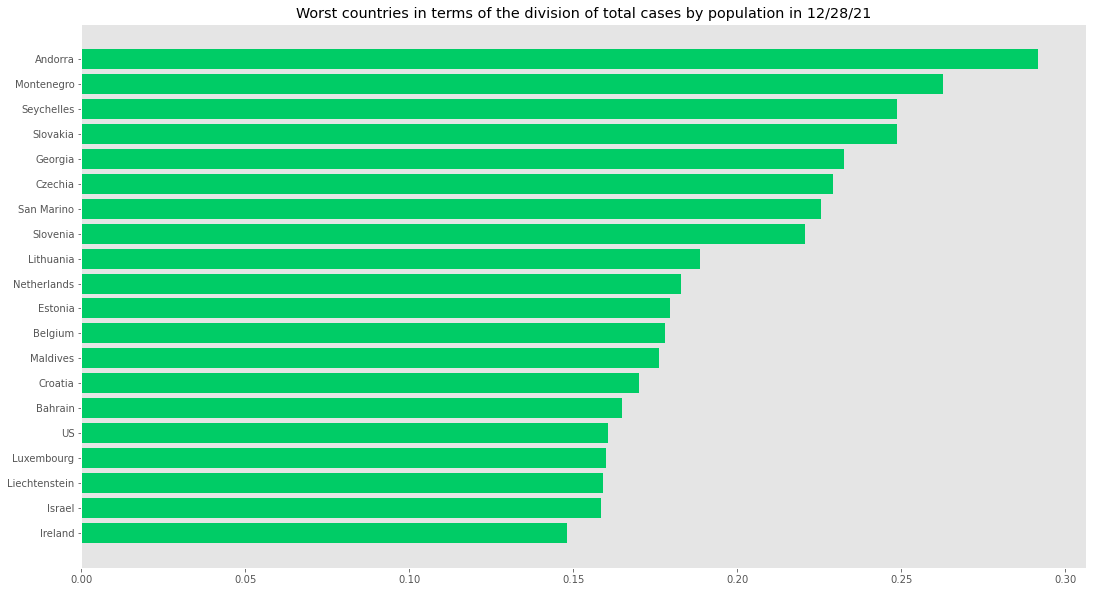

In [25]:
single_total_cases_to_population(n_shown_countries=20)

***This chart is obtained by this method: Dividing the total number of patients by the population of the country for each day***

## other charts

In [26]:
def total_counts(df, title=''):

    x = df.sum(axis=1).index
    y = df.sum(axis=1)

    fig1 = plt.figure(figsize=(14, 7))
    ax = fig1.add_subplot(111)
    ax.grid(False)
    ax.patch.set_facecolor('#404040')
    ax.ticklabel_format(style='plain')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_xlabel("date", size=16)
    ax.set_ylabel("count", size=16)
    subtitle_count = df.loc[convert_today_date()].sum()
    ax.text(3, subtitle_count - .2 * subtitle_count,
            f'total cases : {subtitle_count}', color='white', size=12)
    ax.annotate('tipping point', size=12, xy=('3/25/20', df.sum(axis=1).loc['3/25/20']+(int(.3 * df.sum(axis=1).loc['3/27/20']))), xytext=('4/4/20', df.sum(axis=1).loc['4/4/20']+(int(.2 * df.sum(axis=1).loc[convert_today_date()]))),
                color='white', arrowprops=dict(facecolor='white', shrink=1))

    plt.locator_params(nbins=4)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=12)
    plt.xlabel('date')
    plt.plot(df.sum(axis=1), color='red', lw=2.5)
    plt.title(title + f' (until {convert_today_date()}) ')
    plt.fill_between(x, y, alpha=.7)
    plt.show()

**example**


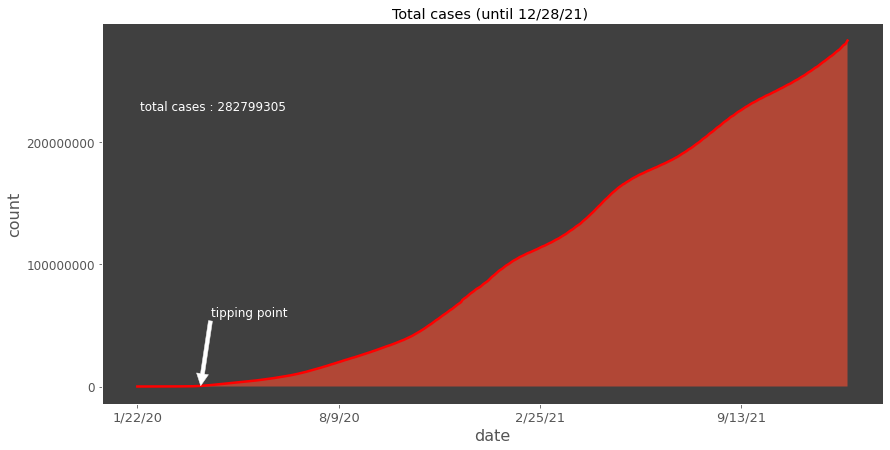

In [27]:
total_counts(c_df, title='Total cases')

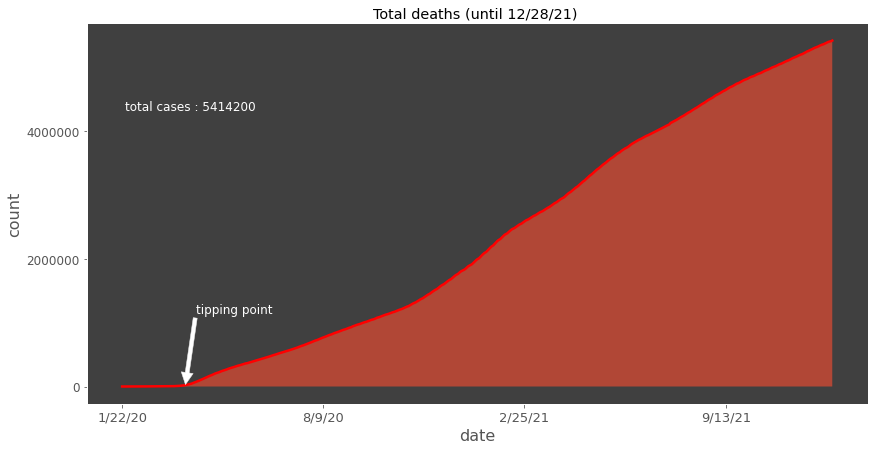

In [28]:
total_counts(d_df, title='Total deaths')

### line charts

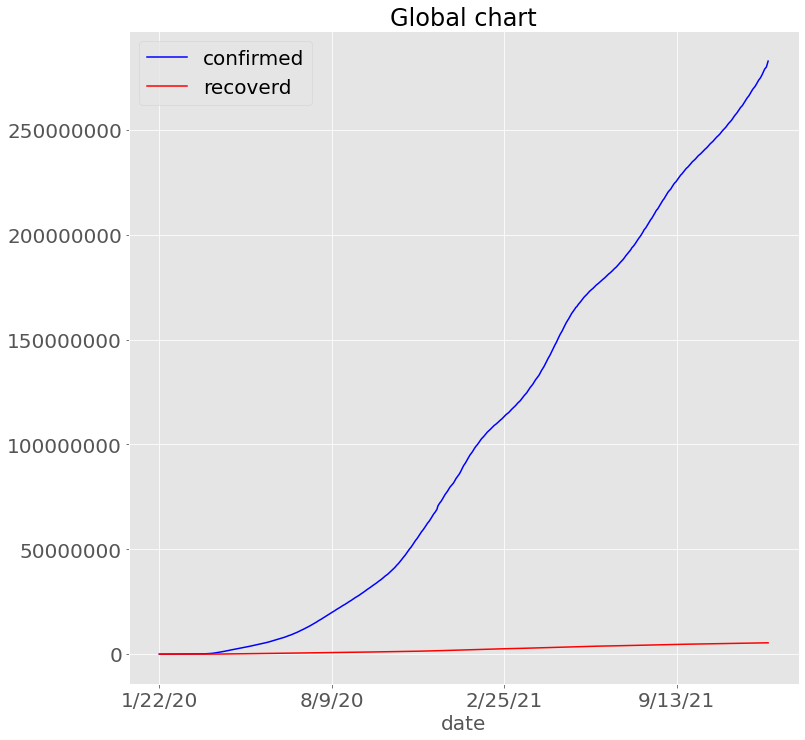

In [29]:
fig1 = plt.figure(figsize=(12, 12))
ax = fig1.add_subplot(111)

ax.ticklabel_format(style='plain')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.xlabel('date', size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(c_df.loc[:convert_today_date()].sum(axis=1), color='blue')
plt.plot(d_df.loc[:convert_today_date()].sum(axis=1), color='red')

plt.legend(['confirmed', 'recoverd', 'deaths'], prop={'size': 20})
plt.title('Global chart', size=24);

In [30]:
def country_chart(country='US', deaths=True):
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(111)
    subtitle_count_c = c_df.loc[convert_today_date(), 'US'].sum()
    ax.ticklabel_format(style='plain')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ylim = int(ax.get_ylim()[1])

    plt.xlabel('date', size=20)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    plt.plot(c_df.loc[:convert_today_date()][country], label='confirmed', color='blue')
    if deaths:
        plt.plot(d_df.loc[:convert_today_date()][country], label='deaths', color='red')
    plt.legend(prop={'size': 20})
    plt.title(f'COVID-19 chart for {country}', size=22)
    plt.show()

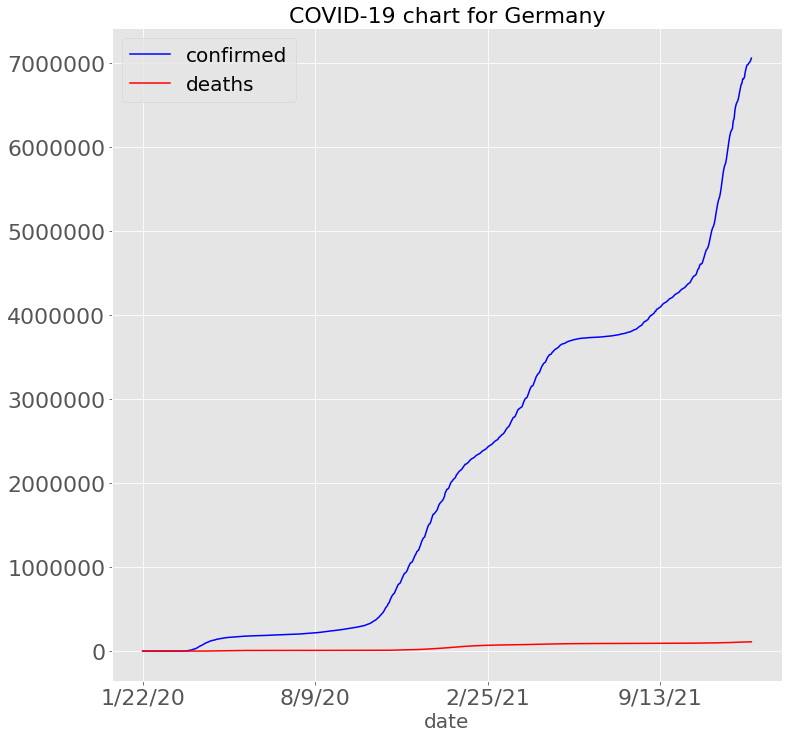

In [31]:
country_chart('Germany')

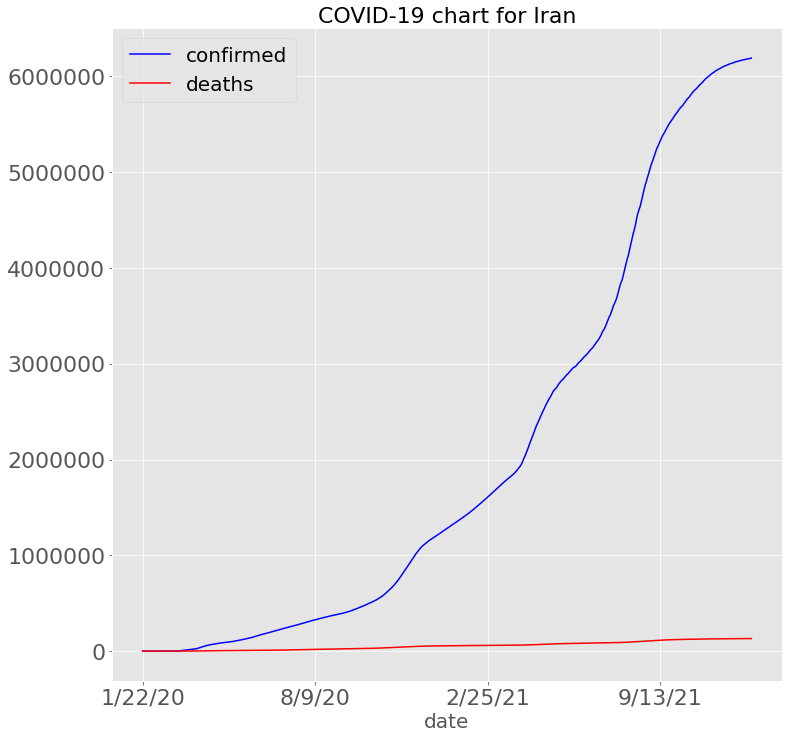

In [32]:
country_chart('Iran')

In [33]:
def new_cases_chart(df ,kind = 'bar', country = 'Iran' , n_results = 30 , title = None ):
    if n_results> df.loc[:convert_today_date()].shape[0]:
         warnings.warn(f'''invalid days({n_results}) requested. setting n_results to {df.loc[:convert_today_date()].shape[0]} which is the maximum number of days currently avilable.''')
         n_results = df.loc[:convert_today_date()].shape[0]
    d = df.loc[:convert_today_date()].tail(n_results)[country]
    l = df.loc[:convert_today_date()].tail(n_results)[country].index.tolist()
    ll = []
            
    for day in l:
        try :
            ll.append(d.loc[l[l.index(day)+1]] - d.loc[l[l.index(day)]])
        except IndexError:
            break

    kwargs = {'alpha':1, 'linestyle':'-', 'linewidth':2, 'edgecolor':'k'}
    fig1 = plt.figure(figsize=(20,8))
    ax = plt.subplot(111)
    plt.title(f'distribution of {title} in {country} (last {n_results} days)', fontsize = 20);
    plt.xlabel('date', fontsize = 20);
    plt.xticks(rotation=45,fontsize=12)
    plt.yticks(fontsize=19)
    
    if kind =='bar':
        sns.barplot(x = l[:-1] , y = ll,saturation=.8,**kwargs);
        ax.xaxis.set_major_locator(plt.MaxNLocator(30))
    elif kind =='line':
        ax.grid(False)
        ax.xaxis.set_major_locator(plt.MaxNLocator(30))
        plt.plot(l[:-1],  ll , lw = 4 , color = 'r' );
        
    else:
        raise ValueError('invalid value for kind')

#### description of some effective parameters listed as below :


   - **new cases chart**
       > 1. ***`country`*** :
           *name of target country*
       > 1. ***`n_results`*** :
           *this parameter determines last days result. for example,
           {n_result = 30} will show the results for last 30 days.*

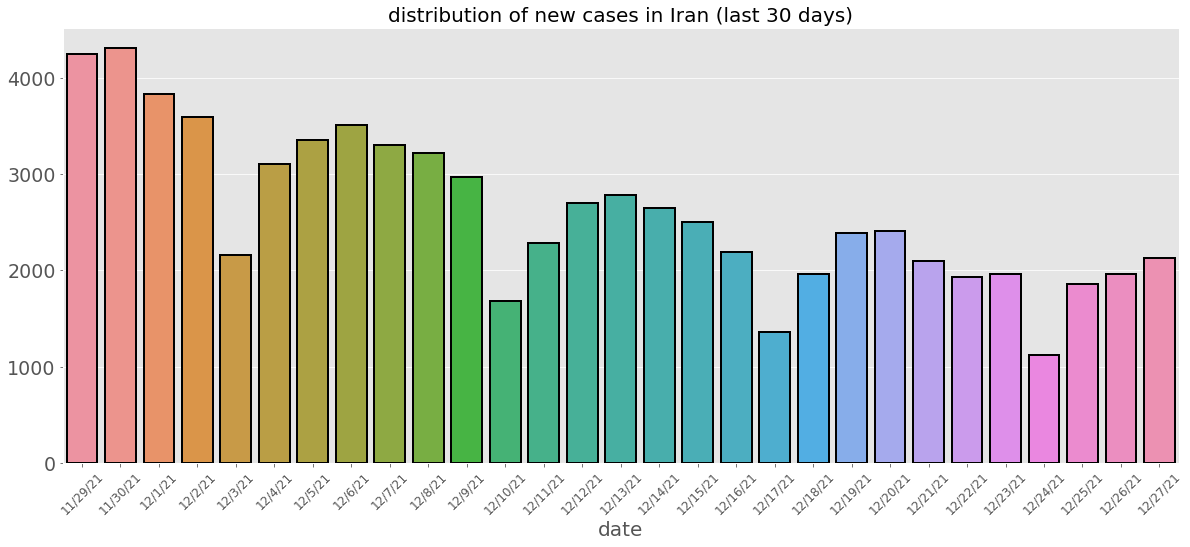

In [34]:
new_cases_chart(c_df ,country='Iran' , title = 'new cases',n_results=30)

C:\Users\mahdi\AppData\Local\Temp/ipykernel_6900/524381542.py:3: UserWarning: invalid days(6000) requested. setting n_results to 707 which is the maximum number of days currently avilable.
  warnings.warn(f'''invalid days({n_results}) requested. setting n_results to {df.loc[:convert_today_date()].shape[0]} which is the maximum number of days currently avilable.''')


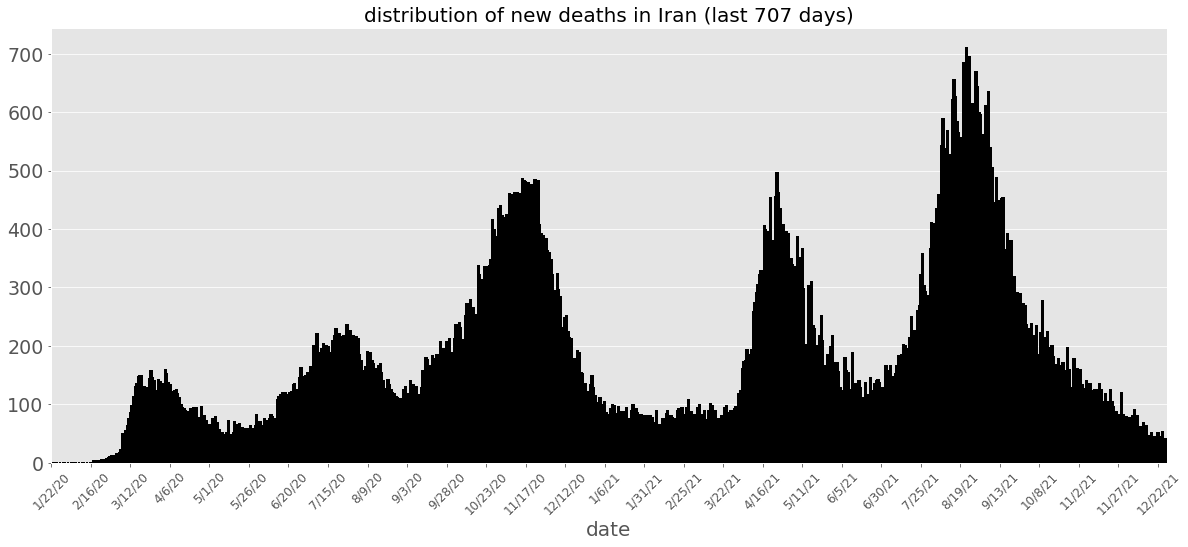

In [35]:
new_cases_chart(d_df,country='Iran',n_results=6000,kind='bar',title='new deaths')

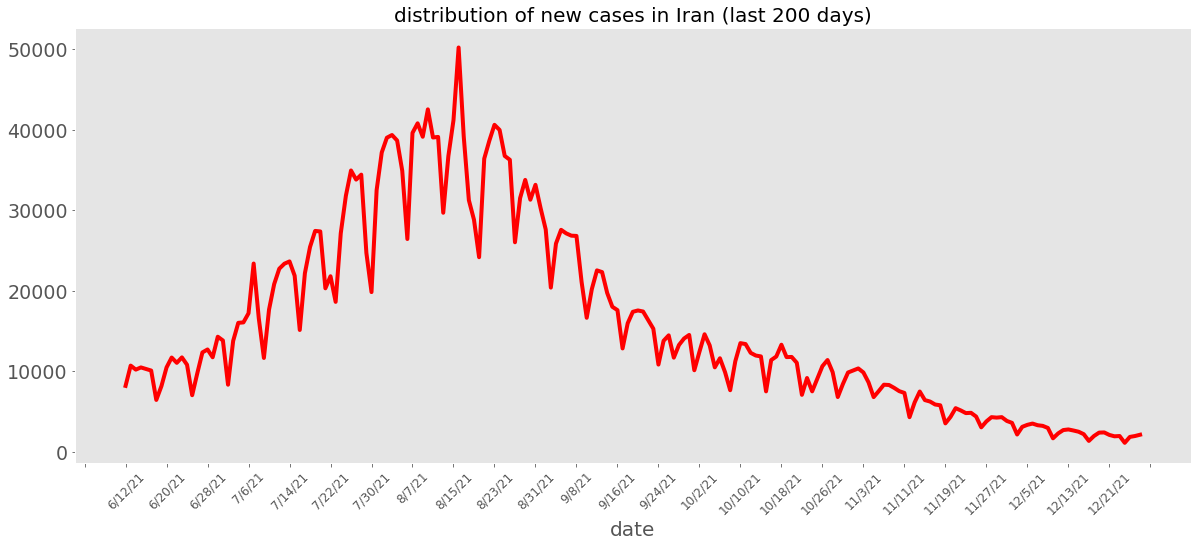

In [36]:
new_cases_chart(c_df,country='Iran',n_results=200,kind='line',title='new cases')

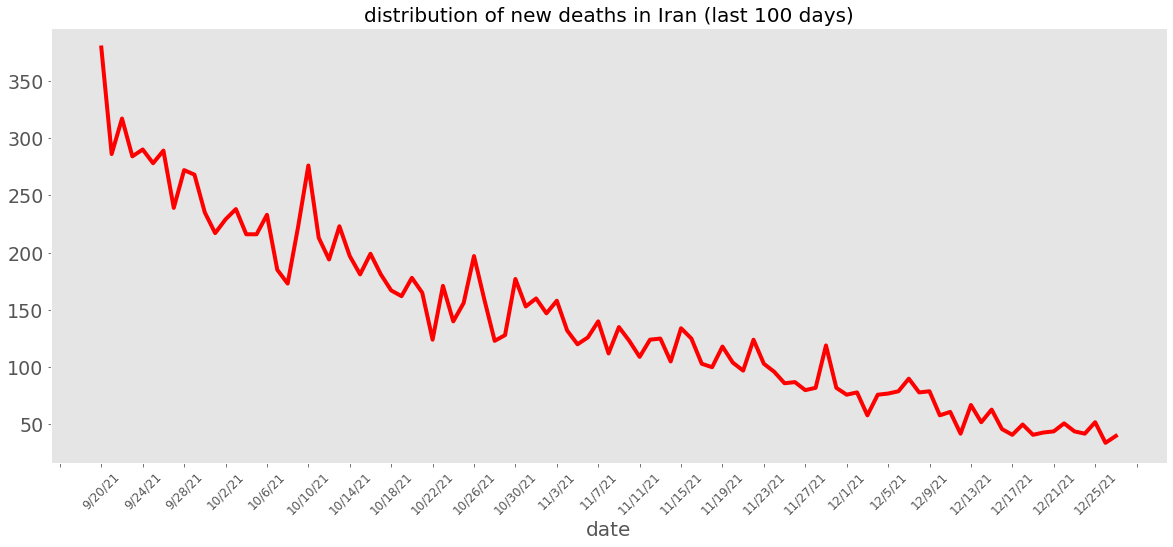

In [37]:
new_cases_chart(d_df,country='Iran',n_results=100,kind='line',title='new deaths')

### animated plot for daily cases

In [ ]:
import matplotlib.animation as animation 

def animated_daily_case(df,kind = 'line', country = 'Iran',start_date = '1/22/20',stop_date = '12/12/20' ,save = False ,main_title = '',save_title = 'animated_plot'):

    d = df.loc[start_date:stop_date][country]

    fig1 = plt.figure(figsize=(22,10))
    ax = plt.subplot(111)
    ax.grid(False)
    plt.xlabel('date', fontsize = 20);
    plt.xticks(rotation=45,fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(f'{main_title} in {country} from {start_date} to {stop_date}',size=20)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))

    def animate(i):
        ll=[]
        data = d.iloc[:int(i+1)]
        l = data.index.tolist()
        for day in l:
            try :
                ll.append(d.loc[l[l.index(day)+1]] - d.loc[l[l.index(day)]])
            except IndexError:
                break
        temp = pd.Series(ll,index=l[:-1],dtype='float64')
        if kind == 'bar':
            a = plt.bar(l[:-1], temp,color="#660000", linestyle = '-' , linewidth=1.12 , edgecolor='k',width = .91);
            return a
        if kind =='line':
            a = sns.lineplot(x = l[:-1],y=temp,color = '#660000')
            b = plt.fill_between(l[:-1], temp, alpha=.9,color='#660000');
            return a,b
    anim = animation.FuncAnimation(
    fig1, animate ,interval=141,frames = len(d.index.tolist())+5)
    if save:
        anim.save(f'{save_title}')
    plt.show()

THANKS!